In [1]:
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def readDf():
    if not os.path.exists('./concat.csv'):
        path = 'C:/Projects/Bootcamp Ödev Cevapları/Untitled Folder/mart-eylül' # get path for all files that used by EDA
        all_files = glob.glob(path + "/*.txt")
        # create empty list and append all files
        file_list = []

        for filename in all_files:
            df = pd.read_csv(filename)
            file_list.append(df)

        # Concatenate all data into one DataFrame that called "mta"
        mta = pd.concat(file_list)
        mta.columns = mta.columns.str.strip() #In case we have some unwanted spaces
        mta.to_csv('concat.csv', index=None)
        return mta
    else:
        return pd.read_csv('concat.csv')

In [3]:
mta = readDf()

In [4]:
mta['DATE_TIME'] = pd.to_datetime(mta["DATE"]+ " " + mta["TIME"], format='%m/%d/%Y %H:%M:%S')
mta['TURNSTILE'] = mta['C/A'] + ' ' + mta['UNIT'] + ' ' + mta['SCP'] + ' ' + mta['STATION']
mta.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace=True)

In [5]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00,A002 R051 02-00-00 59 ST


In [6]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279677 entries, 0 to 6279882
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 670.7+ MB


In [7]:
mta.shape

(6279677, 13)

In [8]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [9]:
#Checking null values based on columns

mta.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
TURNSTILE    0
dtype: int64

In [10]:
mta.describe()

,ENTRIES,EXITS
count,6.279677e+06,6.279677e+06
mean,4.173093e+07,3.346020e+07
std,2.183711e+08,1.926419e+08
min,0.000000e+00,0.000000e+00
25%,2.188090e+05,9.744800e+04
50%,1.424042e+06,8.612790e+05
75%,6.052079e+06,3.990674e+06
max,2.147432e+09,2.133797e+09


In [11]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [12]:
##So we don't want the recovered audits. We want regular ones.
#mta= pd.DataFrame(mta[mta.DESC=='REGULAR'])

In [13]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [14]:
mta['ENTRIES'] = mta['ENTRIES'].astype('int')
mta['EXITS'] = mta['EXITS'].astype('int')

In [15]:
mta['WEEKDAY'] = mta["DATE_TIME"].dt.day_name()

In [16]:
mta = mta[["STATION","TURNSTILE","DATE","TIME","DATE_TIME","WEEKDAY","ENTRIES","EXITS"]]
mta.sample(5)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
2140829,96 ST,N040 R251 00-00-02 96 ST,05/14/2021,16:00:00,2021-05-14 16:00:00,Friday,12131509,7680390
5763581,SUTPHIN-ARCHER,N605 R024 00-00-06 SUTPHIN-ARCHER,09/10/2021,20:00:00,2021-09-10 20:00:00,Friday,5672268,2773829
1502845,MARCY AV,J001 R460 01-06-01 MARCY AV,04/19/2021,09:00:00,2021-04-19 09:00:00,Monday,713546,479340
5038161,AVENUE H,B020 R263 00-05-02 AVENUE H,08/19/2021,20:00:00,2021-08-19 20:00:00,Thursday,583115,779815
2253752,GRD CNTRL-42 ST,R241A R048 00-00-00 GRD CNTRL-42 ST,05/11/2021,13:00:00,2021-05-11 13:00:00,Tuesday,1639042,2115729


In [17]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
0,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,7537255,2570434
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582


In [18]:
mta.sort_values(by='DATE_TIME')
mta['NO_OF_ENTRIES']= mta['ENTRIES'].diff()
mta['NO_OF_EXITS']= mta['EXITS'].diff()


In [19]:
mta.describe()

,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS
count,6.279677e+06,6.279677e+06,6.279676e+06,6.279676e+06
mean,4.173093e+07,3.346020e+07,-1.199377e+00,-4.092230e-01
std,2.183711e+08,1.926419e+08,4.652105e+07,4.129563e+07
min,0.000000e+00,0.000000e+00,-2.144357e+09,-2.133741e+09
25%,2.188090e+05,9.744800e+04,2.000000e+00,4.000000e+00
50%,1.424042e+06,8.612790e+05,2.400000e+01,2.600000e+01
75%,6.052079e+06,3.990674e+06,8.100000e+01,8.400000e+01
max,2.147432e+09,2.133797e+09,2.147040e+09,2.133741e+09


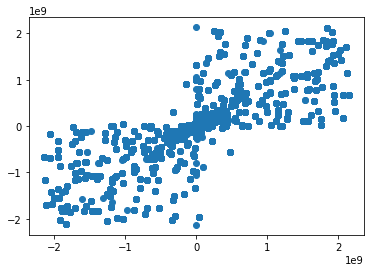

In [20]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [21]:
mask_negatives = (mta.NO_OF_ENTRIES >0) & (mta.NO_OF_EXITS >0)

In [22]:
mta = mta[mask_negatives]

In [23]:
mta.shape

(4891943, 10)

In [24]:
count = (mta.NO_OF_EXITS < 0).sum()
count2 = (mta.NO_OF_ENTRIES < 0).sum()
print("no of exits :",count,"   "," no of entries :", count2)

no of exits : 0      no of entries : 0


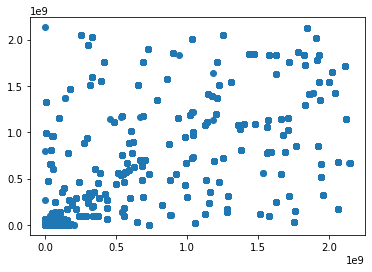

In [25]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [26]:
mta['NO_OF_ENTRIES'][mta['NO_OF_ENTRIES'] > (mta['NO_OF_ENTRIES'].quantile(0.98))] = mta['NO_OF_ENTRIES'].median()
mta['NO_OF_EXITS'][mta['NO_OF_EXITS'] > (mta['NO_OF_EXITS'].quantile(0.98))] = mta['NO_OF_EXITS'].median()                                             

In [27]:
mta['TRAFFIC'] = mta['NO_OF_ENTRIES'] + mta['NO_OF_EXITS']

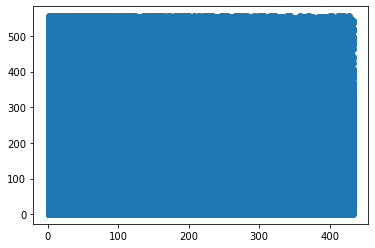

In [28]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [29]:
mta['NO_OF_ENTRIES'].mean()

67.86324472709515

In [30]:
mta['NO_OF_EXITS'].mean()

74.03894280861408

In [31]:
mta.NO_OF_EXITS.max()

555.0

In [32]:
mta.NO_OF_ENTRIES.median()

42.0

In [33]:
mta.NO_OF_EXITS.median()

42.0

C:\Users\osman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NO_OF_ENTRIES', ylabel='Density'>

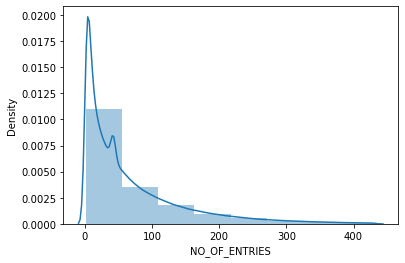

In [34]:
sns.distplot(mta['NO_OF_ENTRIES'],bins=8)

In [35]:
mta.sort_values(by=['NO_OF_ENTRIES','NO_OF_EXITS'], ascending=False).head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC
5335701,GRAND ST,N520 R240 00-00-00 GRAND ST,08/23/2021,16:00:00,2021-08-23 16:00:00,Monday,20879514,22926154,433.0,543.0,976.0
5495003,42 ST-PORT AUTH,N063A R011 00-00-01 42 ST-PORT AUTH,08/31/2021,12:00:00,2021-08-31 12:00:00,Tuesday,1281417540,179392342,433.0,541.0,974.0
5541073,34 ST-HERALD SQ,N506 R022 00-05-04 34 ST-HERALD SQ,08/29/2021,16:00:00,2021-08-29 16:00:00,Sunday,140937,152517,433.0,535.0,968.0
5463253,36 ST,C018 R197 00-00-00 36 ST,09/02/2021,21:00:00,2021-09-02 21:00:00,Thursday,402089,609221,433.0,520.0,953.0
2531536,36 ST,C018 R197 00-00-00 36 ST,05/24/2021,17:00:00,2021-05-24 17:00:00,Monday,253970,379008,433.0,519.0,952.0


In [82]:
def divideDateTime(x):
    time = datetime.strptime(x.strftime("%y-%m-%d %H:%M:%S"), "%y-%m-%d %H:%M:%S")
    if(time.hour>18):
        return 'EVENING'
    elif(time.hour > 12):
        return 'AFTERNOON'
    elif(time.hour>6):
        return 'MORNING'
    else:
        return 'NIGHT'
        

In [83]:
mta['DAY_PART'] = mta['DATE_TIME'].apply(divideDateTime)

In [84]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC,DAY_PART
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445,5.0,11.0,16.0,MORNING
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500,25.0,55.0,80.0,MORNING
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546,69.0,46.0,115.0,AFTERNOON
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582,147.0,36.0,183.0,EVENING
5,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,7537589,2570596,88.0,14.0,102.0,EVENING


In [36]:
mta.NO_OF_ENTRIES.value_counts()

1.0      171797
2.0      151099
3.0      134902
42.0     128107
4.0      120754
          ...  
429.0       391
430.0       389
428.0       386
426.0       385
432.0       364
Name: NO_OF_ENTRIES, Length: 433, dtype: int64

In [37]:
mta.groupby(['TURNSTILE','DATE_TIME']).sum().head(10)

ENTRIES    EXITS  NO_OF_ENTRIES  \
TURNSTILE                DATE_TIME                                              
A002 R051 02-00-00 59 ST 2021-02-27 07:00:00  7537260  2570445            5.0   
                         2021-02-27 11:00:00  7537285  2570500           25.0   
                         2021-02-27 15:00:00  7537354  2570546           69.0   
                         2021-02-27 19:00:00  7537501  2570582          147.0   
                         2021-02-27 23:00:00  7537589  2570596           88.0   
                         2021-02-28 03:00:00  7537598  2570598            9.0   
                         2021-02-28 07:00:00  7537602  2570602            4.0   
                         2021-02-28 11:00:00  7537625  2570637           23.0   
                         2021-02-28 15:00:00  7537696  2570671           71.0   
                         2021-02-28 19:00:00  7537791  2570709           95.0   

                                              NO_OF_EXITS  TRAFFIC  
TURNSTILE                DATE_TIME                                  
A002 R051 02-00-00 59 ST 2021-02-27 07:00:00         11.0     16.0  
                         2021-02-27 11:00:00         55.0     80.0  
                         2021-02-27 15:00:00         46.0    115.0  
                         2021-02-27 19:00:00         36.0    183.0  
                         2021-02-27 23:00:00         14.0    102.0  
                         2021-02-28 03:00:00          2.0     11.0  
                         2021-02-28 07:00:00          4.0      8.0  
                         2021-02-28 11:00:00         35.0     58.0  
                         2021-02-28 15:00:00         34.0    105.0  
                         2021-02-28 19:00:00         38.0    133.0

In [38]:
mta.groupby(['STATION','DATE_TIME']).sum().head(10)

ENTRIES        EXITS  NO_OF_ENTRIES  \
STATION DATE_TIME                                                      
1 AV    2021-02-27 03:00:00  451163974.0  461798731.0          294.0   
        2021-02-27 07:00:00  458188104.0  447514200.0           62.0   
        2021-02-27 11:00:00  462420964.0  466576981.0          593.0   
        2021-02-27 15:00:00  462422200.0  466579111.0         1236.0   
        2021-02-27 19:00:00  462421188.0  466540320.0         1514.0   
        2021-02-27 23:00:00  462424702.0  466583090.0          988.0   
        2021-02-28 03:00:00  462425044.0  466583547.0          342.0   
        2021-02-28 07:00:00  456604993.0  448511959.0           40.0   
        2021-02-28 11:00:00  455762877.0  466018753.0          468.0   
        2021-02-28 15:00:00  462426613.0  466586507.0         1047.0   

                             NO_OF_EXITS  TRAFFIC  
STATION DATE_TIME                                  
1 AV    2021-02-27 03:00:00        273.0    567.0  
        2021-02-27 07:00:00        218.0    280.0  
        2021-02-27 11:00:00       1252.0   1845.0  
        2021-02-27 15:00:00       2130.0   3366.0  
        2021-02-27 19:00:00       2321.0   3835.0  
        2021-02-27 23:00:00       1658.0   2646.0  
        2021-02-28 03:00:00        457.0    799.0  
        2021-02-28 07:00:00        165.0    205.0  
        2021-02-28 11:00:00        935.0   1403.0  
        2021-02-28 15:00:00       1832.0   2879.0

In [39]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891943 entries, 1 to 6279841
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   STATION        object        
 1   TURNSTILE      object        
 2   DATE           object        
 3   TIME           object        
 4   DATE_TIME      datetime64[ns]
 5   WEEKDAY        object        
 6   ENTRIES        int32         
 7   EXITS          int32         
 8   NO_OF_ENTRIES  float64       
 9   NO_OF_EXITS    float64       
 10  TRAFFIC        float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 410.5+ MB


In [40]:
mta.sort_values(by='TRAFFIC', ascending= False)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC
5070854,125 ST,N026 R102 00-00-00 125 ST,08/16/2021,20:00:00,2021-08-16 20:00:00,Monday,447700,611900,428.0,555.0,983.0
3012760,JKSN HT-ROOSVLT,N324 R018 00-00-04 JKSN HT-ROOSVLT,06/11/2021,20:00:00,2021-06-11 20:00:00,Friday,5253322,3599057,426.0,553.0,979.0
2403736,GRAND ST,N520 R240 00-00-00 GRAND ST,05/20/2021,16:00:00,2021-05-20 16:00:00,Thursday,20735160,22692325,430.0,547.0,977.0
5335701,GRAND ST,N520 R240 00-00-00 GRAND ST,08/23/2021,16:00:00,2021-08-23 16:00:00,Monday,20879514,22926154,433.0,543.0,976.0
1694995,36 ST,C018 R197 00-00-00 36 ST,04/30/2021,17:00:00,2021-04-30 17:00:00,Friday,221526,328985,427.0,548.0,975.0
...,...,...,...,...,...,...,...,...,...,...,...
5472875,6 AV,H003 R163 01-06-00 6 AV,09/03/2021,12:00:00,2021-09-03 12:00:00,Friday,16797279,65343,1.0,1.0,2.0
2417578,HARRISON,PTH02 R544 00-04-01 HARRISON,05/16/2021,13:29:35,2021-05-16 13:29:35,Sunday,4875,10579,1.0,1.0,2.0
2417575,HARRISON,PTH02 R544 00-04-01 HARRISON,05/16/2021,00:53:35,2021-05-16 00:53:35,Sunday,4874,10578,1.0,1.0,2.0
3995492,JAY ST-METROTEC,C004 R089 01-06-00 JAY ST-METROTEC,07/10/2021,04:00:00,2021-07-10 04:00:00,Saturday,659538,418676,1.0,1.0,2.0


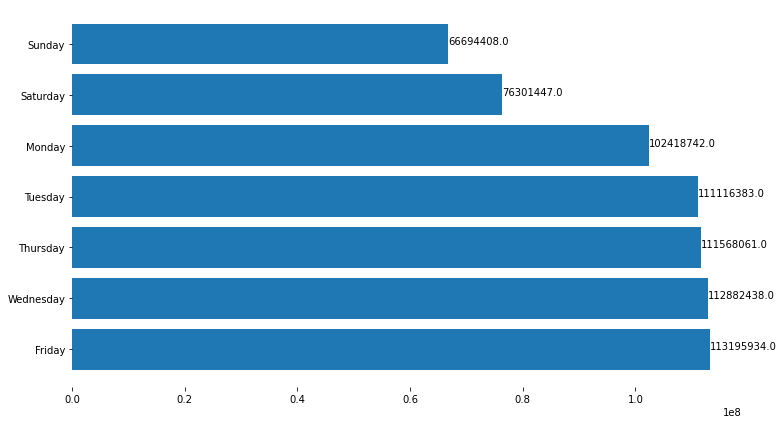

In [57]:
week_day_traffic =pd.DataFrame(mta.groupby('WEEKDAY')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize =(12, 7))
plt.box(False)
plt.barh(week_day_traffic['WEEKDAY'],week_day_traffic['TRAFFIC'])

for index, value in enumerate(week_day_traffic['TRAFFIC']):
    plt.text(value, index, str(value))

In [61]:
most_seven_station = pd.DataFrame(mta.groupby('STATION')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_seven_station.head(7)

,STATION,TRAFFIC
0,34 ST-PENN STA,17242070.0
1,86 ST,11760861.0
2,GRD CNTRL-42 ST,11692133.0
3,34 ST-HERALD SQ,11649135.0
4,125 ST,11490483.0
5,23 ST,11232915.0
6,14 ST-UNION SQ,10919402.0


In [62]:
top_seven = ('34 ST-PENN STA','86 ST','GRD CNTRL-42 ST','34 ST-HERALD SQ','125 ST','23 ST','14 ST-UNION SQ')

In [72]:
most_crowded_hours = pd.DataFrame(mta.groupby('TIME')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_crowded_hours.tail(15)

,TIME,TRAFFIC
70616,03:51:28,2.0
70617,00:26:54,2.0
70618,06:20:02,2.0
70619,05:54:03,2.0
70620,04:41:33,2.0
70621,05:00:49,2.0
70622,06:36:45,2.0
70623,02:26:13,2.0
70624,20:35:01,2.0
70625,17:03:21,2.0


In [85]:
most_traffic_daypart = pd.DataFrame(mta.groupby('DAY_PART')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_traffic_daypart.head()

,DAY_PART,TRAFFIC
0,AFTERNOON,231025826.0
1,MORNING,195496551.0
2,EVENING,187141456.0
3,NIGHT,80513580.0
